<a href="https://colab.research.google.com/github/YahiaOsamaYahia/Selected-2/blob/main/Skin_Cancer_ISIC_CNN_87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SKIN CANCER MULTICLASS IMAGE CLASSIFICATION VIA FINE-TUNING WITH EFFICIENTNET**

# Table of Contents:
**1** - Introduction

**2** - Import Libraries

**3** - Read and Overview Data

**4** - Load Data

**5** - Data Augmentation

**6** - Prepare Inputs

**7** - Training A Model From Scratch

**8** - Validation Accuracy & Loss Curve

**9** - Transfer Learning From Pre-Trained Weights

**10** - Unfreezing Model

**11** - Model Prediction

**12** - Test Accuracy

**13** - Confusion Matrix

**14** - Training Loss Curve

**15** - ROC Curve

**16** - Conclusion

### **1 - INTRODUCTION**

The various deep learning methods use data to train neural network algorithms to do a variety of machine learning tasks, such as the classification of different classes of objects. Convolutional neural networks are deep learning algorithms that are very powerful for the analysis of images. Convolutional Neural Networks specialized for applications in image & video recognition. It is mainly used in image analysis tasks like Image recognition, Object detection & Segmentation.

**Absrtact**

Skin cancer is one of the most prevalent and deadly types of cancer. Dermatologists diagnose this disease primarily visually. Multiclass skin cancer classification is challenging due to the fine-grained variability in the appearance of its various diagnostic categories. On the other hand, recent studies have demonstrated that convolutional neural networks outperform dermatologists in multiclass skin cancer classification. We developed a preprocessing image pipeline for this work. We removed hairs from the images, augmented the dataset, and resized the imageries to meet the requirements of our model. By performing transfer learning on pre-trained ImageNet weights and fine-tuning the Convolutional Neural Networks, we trained the EfficientNet B0 on the Skin Cancer dataset. Our model, the EfficientNet B0, achieved a final Accuaracy of 60%. The classification score resulted from many factors such as resolution scaling, data enhancement, noise removal, successful transfer learning of ImageNet weights, and fine-tuning.


### **2 - IMPORT LIBRARIES**

In [40]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras
import tensorflow_hub as hub
import tensorflow.keras.layers
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import Image
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.python.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [42]:
drive.mount('/content/drive')  # access my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **3 - READ AND OVERVIEW DATA**

*Showing one Melanoma and one Nevus to see how it looks*

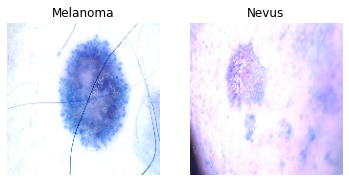

In [43]:
data1 = cv2.imread("/content/drive/MyDrive/Skin Cancer/melanoma/melanoma_original_ISIC_00111125.jpg") #Melanoma path and call one image
data1 = cv2.resize(data1,(160,160)) 
plt.subplot(1,2,1)
plt.imshow(data1)
plt.axis("off")
plt.title("Melanoma")
data1 = cv2.imread("/content/drive/MyDrive/Skin Cancer/nevus/nevus_original_ISIC_00286199.jpg") #Nevus path and call one image
data1 = cv2.resize(data1,(160,160))
plt.subplot(1,2,2)
plt.imshow(data1)
plt.axis("off")
plt.title("Nevus")
plt.show()

### **4 - LOAD DATA**

All data is read and resized per image to 224px, 224px to lower processing power. images and labels datas are created. Images will be in "images" data and "labels" data for its correspond.

In [44]:
images = list()
labels = list()

for i in os.listdir("/content/drive/MyDrive/Skin Cancer/actinic keratosis/"): #read all Actinic Keratosis data 
    if ".jpg" in i: #this if block for only read .jpg files
        path = "/content/drive/MyDrive/Skin Cancer/actinic keratosis/"+i # create path
        img = plt.imread(path) # read created path
        img = cv2.resize(img,(224,224)) # resize image for lower processing power
        images.append(img) # append image to images data
        labels.append(0)
        
for i in os.listdir("/content/drive/MyDrive/Skin Cancer/basal cell carcinoma/"): #read all Basal Cell Carcinoma data 
    if ".jpg" in i: #this if block for only read .jpg files
        path = "/content/drive/MyDrive/Skin Cancer/basal cell carcinoma/"+i # create path
        img = plt.imread(path) # read created path
        img = cv2.resize(img,(224,224)) # resize image for lower processing power
        images.append(img) # append image to images data
        labels.append(1)
for i in os.listdir("/content/drive/MyDrive/Skin Cancer/dermatofibroma/"): #read all Dermatofibroma data 
    if ".jpg" in i: #this if block for only read .jpg files
        path = "/content/drive/MyDrive/Skin Cancer/dermatofibroma/"+i # create path
        img = plt.imread(path) # read created path
        img = cv2.resize(img,(224,224)) # resize image for lower processing power
        images.append(img) # append image to images data
        labels.append(2)
for i in os.listdir("/content/drive/MyDrive/Skin Cancer/pigmented benign keratosis/"): #read all Pigmented Benign Keratosis data 
    if ".jpg" in i: #this if block for only read .jpg files
        path = "/content/drive/MyDrive/Skin Cancer/pigmented benign keratosis/"+i # create path
        img = plt.imread(path) # read created path
        img = cv2.resize(img,(224,224)) # resize image for lower processing power
        images.append(img) # append image to images data
        labels.append(3)
for i in os.listdir("/content/drive/MyDrive/Skin Cancer/vascular lesion/"): #read all Vascular Lesion data 
    if ".jpg" in i: #this if block for only read .jpg files
        path = "/content/drive/MyDrive/Skin Cancer/vascular lesion/"+i # create path
        img = plt.imread(path) # read created path
        img = cv2.resize(img,(224,224)) # resize image for lower processing power
        images.append(img) # append image to images data
        labels.append(4)
images = np.array(images)

images.shape[0] #array length

5067

**Show 4 data randomly and their status**

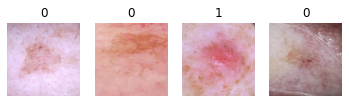

In [45]:
plt.subplot(1,4,1)
plt.imshow(images[20]) # image 1
plt.title(labels[20])
plt.axis("off")
plt.subplot(1,4,2) # image 2
plt.imshow(images[300])
plt.title(labels[300])
plt.axis("off")
plt.subplot(1,4,3) #image 3
plt.imshow(images[2000])
plt.title(labels[2000])
plt.axis("off")
plt.subplot(1,4,4) #image 4 
plt.imshow(images[200])
plt.title(labels[200])
plt.axis("off")
plt.show()

### **5 - DATA AUGMENTATION**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

The labels are put into One-Hot (a.k.a. categorical) encoding.

In [47]:
def input_preprocess(images, labels):
    label = tf.one_hot(labels, 5)
    return images, labels

### **6 - PREPARE INPUTS**

*Test split*

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(images,labels,train_size = 0.8, random_state = 0)

*Validation and train split*

In [49]:
x_train,x_val,Y_train,Y_val = train_test_split(x_train, Y_train, test_size = 0.1, random_state = 42)

*Convert the fields into a numpy array*

In [50]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)


*Show number of samples and dimensions on each split*

In [51]:
print("Train Split: ", x_train.shape)
print("Test Split: ", x_test.shape)
print("Validation Split: ", x_val.shape)

Train Split:  (3647, 224, 224, 3)
Test Split:  (1014, 224, 224, 3)
Validation Split:  (406, 224, 224, 3)


### **7 - TRAINING A MODEL FROM SCRATCH**

We build an EfficientNetB0 with 9 output classes, that is initialized from scratch.

In [52]:
from tensorflow.keras.applications import EfficientNetB0

with strategy.scope():
    inputs = layers.Input(shape=(224, 224, 3))
    x = img_augmentation(inputs)
    outputs = EfficientNetB0(include_top=True, weights=None, classes=5)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
    )

model.summary()

epochs = 40  # @param {type: "slider", min:10, max:100}

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 img_augmentation (Sequentia  (None, 224, 224, 3)      0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, 5)                4055976   
                                                                 
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________


*Model Fitting with Batch Size of 32 & 40 Epochs.*

In [53]:
hist = model.fit(x_train,Y_train ,epochs=epochs , validation_data=(x_val,Y_val))

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


114/114 [==============================] - 62s 373ms/step - loss: 2.6520 - accuracy: 0.2852 - val_loss: 1.7064 - val_accuracy: 0.1995
Epoch 2/40
114/114 [==============================] - 39s 339ms/step - loss: 1.4943 - accuracy: 0.3951 - val_loss: 2.0596 - val_accuracy: 0.2143
Epoch 3/40
114/114 [==============================] - 39s 339ms/step - loss: 1.3701 - accuracy: 0.4332 - val_loss: 1.9409 - val_accuracy: 0.2118
Epoch 4/40
114/114 [==============================] - 38s 337ms/step - loss: 1.3261 - accuracy: 0.4724 - val_loss: 1.5128 - val_accuracy: 0.3128
Epoch 5/40
114/114 [==============================] - 38s 336ms/step - loss: 1.1639 - accuracy: 0.5141 - val_loss: 1.3008 - val_accuracy: 0.4409
Epoch 6/40
114/114 [==============================] - 39s 338ms/step - loss: 1.1009 - accuracy: 0.5396 - val_loss: 1.3140 - val_accuracy: 0.4458
Epoch 7/40
114/114 [==============================] - 38s 335ms/step - loss: 1.0898 - accuracy: 0.5629 - val_loss: 1.7612 - val_accuracy: 0.3

*Plotting the training and validation accuracy.*

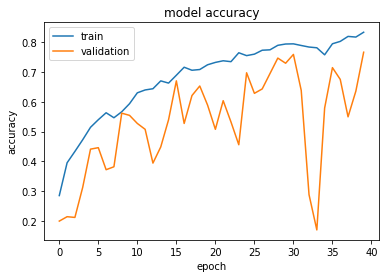

In [54]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

**Top 1 Accuracy Test Result**

In [55]:
test_loss, test_acc = model.evaluate(x_test, Y_test)
print('Test Accuracy: ', test_acc)

32/32 [==============================] - 2s 66ms/step - loss: 0.5843 - accuracy: 0.7899
Test Accuracy:  0.7899408340454102


### **8 - TRANSFER LEARNING FROM PRE-TRAINED WEIGHTS**

*Here we initialize the model with pre-trained ImageNet weights, and we fine-tune it on our own dataset.*

The first step to transfer learning is to freeze all layers and train only the top layers. For this step, a relatively large learning rate (1e-2) can be used. Note that validation accuracy and loss will usually be better than training accuracy and loss. This is because the regularization is strong, which only suppresses training-time metrics.

In [56]:
IMG_SIZE = 224

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
    )
    model.summary()
    return model

  

*Model Fitting with Batch Size of 32 & 25 Epochs.*

In [57]:
NUM_CLASSES = 5

with strategy.scope():
    model = build_model(num_classes=NUM_CLASSES)

epochs = 25  # @param {type: "slider", min:8, max:80}
hist = model.fit(x_train,Y_train ,epochs=epochs , validation_data=(x_val,Y_val), verbose=2)

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['img_augmentation[1][0]']       
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]'] 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


114/114 - 19s - loss: 1.6091 - accuracy: 0.5920 - val_loss: 1.5053 - val_accuracy: 0.4778 - 19s/epoch - 167ms/step
Epoch 2/25
114/114 - 9s - loss: 1.2713 - accuracy: 0.6556 - val_loss: 1.0910 - val_accuracy: 0.6379 - 9s/epoch - 75ms/step
Epoch 3/25
114/114 - 9s - loss: 1.2260 - accuracy: 0.6704 - val_loss: 1.1151 - val_accuracy: 0.6601 - 9s/epoch - 75ms/step
Epoch 4/25
114/114 - 9s - loss: 1.0625 - accuracy: 0.6926 - val_loss: 1.0786 - val_accuracy: 0.6749 - 9s/epoch - 76ms/step
Epoch 5/25
114/114 - 9s - loss: 1.1069 - accuracy: 0.6915 - val_loss: 1.2690 - val_accuracy: 0.6527 - 9s/epoch - 75ms/step
Epoch 6/25
114/114 - 9s - loss: 1.0937 - accuracy: 0.6874 - val_loss: 1.2166 - val_accuracy: 0.6626 - 9s/epoch - 75ms/step
Epoch 7/25
114/114 - 8s - loss: 0.9560 - accuracy: 0.7022 - val_loss: 1.1290 - val_accuracy: 0.6675 - 8s/epoch - 74ms/step
Epoch 8/25
114/114 - 8s - loss: 0.9410 - accuracy: 0.6962 - val_loss: 1.0848 - val_accuracy: 0.6847 - 8s/epoch - 74ms/step
Epoch 9/25
114/114 - 8s 

*Plotting the training and validation accuracy.*

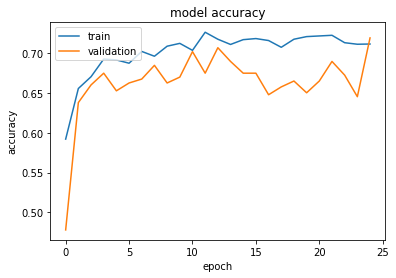

In [58]:
plot_hist(hist)

**Top 2 Accuracy Test Result**

In [59]:
test_loss, test_acc = model.evaluate(x_test, Y_test)
print('Test Accuracy: ', test_acc)

32/32 [==============================] - 2s 65ms/step - loss: 0.6320 - accuracy: 0.7732
Test Accuracy:  0.7731755375862122


### **9 - UNFREEZING MODEL**

The second step is to unfreeze a number of layers and fit the model using smaller learning rate. 

*Here we show unfreezing all layers, but depending on specific dataset it may be desireble to only unfreeze a fraction of all layers.*

In [60]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
    )
    model.summary()
    
unfreeze_model(model)

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['img_augmentation[1][0]']       
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]'] 

*Model Fitting with Batch Size of 32 & 10 Epochs.*

In [61]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

epochs = 15  # @param {type: "slider", min:8, max:50}

hist = model.fit(x_train,Y_train ,epochs=epochs , validation_data=(x_val,Y_val), verbose=2, callbacks=[early_stop])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


114/114 - 21s - loss: 0.6264 - accuracy: 0.7617 - val_loss: 0.8312 - val_accuracy: 0.6897 - 21s/epoch - 186ms/step
Epoch 2/15
114/114 - 9s - loss: 0.5758 - accuracy: 0.7853 - val_loss: 0.7450 - val_accuracy: 0.7167 - 9s/epoch - 82ms/step
Epoch 3/15
114/114 - 9s - loss: 0.5283 - accuracy: 0.8031 - val_loss: 0.6633 - val_accuracy: 0.7611 - 9s/epoch - 82ms/step
Epoch 4/15
114/114 - 10s - loss: 0.4788 - accuracy: 0.8193 - val_loss: 0.6478 - val_accuracy: 0.7512 - 10s/epoch - 89ms/step
Epoch 5/15
114/114 - 9s - loss: 0.4395 - accuracy: 0.8399 - val_loss: 0.6038 - val_accuracy: 0.7734 - 9s/epoch - 82ms/step
Epoch 6/15
114/114 - 9s - loss: 0.4295 - accuracy: 0.8421 - val_loss: 0.6400 - val_accuracy: 0.7562 - 9s/epoch - 81ms/step
Epoch 7/15
114/114 - 9s - loss: 0.3978 - accuracy: 0.8486 - val_loss: 0.5651 - val_accuracy: 0.7857 - 9s/epoch - 81ms/step
Epoch 8/15
114/114 - 9s - loss: 0.3782 - accuracy: 0.8555 - val_loss: 0.5566 - val_accuracy: 0.7833 - 9s/epoch - 81ms/step
Epoch 9/15
114/114 - 9

*Plotting the training and validation accuracy.*

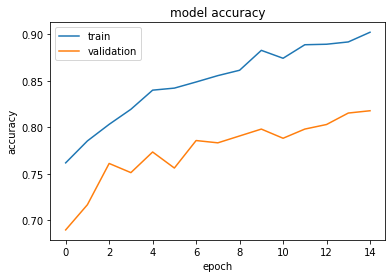

In [62]:
plot_hist(hist)

**Top 3 Accuracy Test Result**

In [63]:
test_loss, test_acc = model.evaluate(x_test, Y_test)
print('Test Accuracy: ', test_acc)

32/32 [==============================] - 2s 65ms/step - loss: 0.3447 - accuracy: 0.8708
Test Accuracy:  0.8708086609840393


### **10 - MODEL PREDICTING**

In [64]:
predictions = model.predict(x_test)
print(predictions)
print(np.argmax(predictions[8]))
print(Y_test[8])

[[6.0659082e-09 3.5680609e-06 1.3669630e-08 5.4459561e-09 9.9999642e-01]
 [3.4123328e-01 2.8239021e-03 2.3564672e-02 6.3237786e-01 2.0187157e-07]
 [9.9419206e-01 7.6034652e-05 1.2253244e-05 5.7181660e-03 1.3911804e-06]
 ...
 [8.3538017e-11 1.0170634e-08 1.5991858e-09 3.1305046e-07 9.9999964e-01]
 [1.4428850e-04 3.5145434e-03 9.9313134e-01 2.9937287e-03 2.1603497e-04]
 [1.5825604e-04 4.0353328e-01 1.5620385e-01 3.6390895e-01 7.6195687e-02]]
1
3


### **11 - TEST ACCURACY**

In [65]:
test_loss, test_acc = model.evaluate(x_test, Y_test)
print('Test Accuracy: ', test_acc)

32/32 [==============================] - 2s 65ms/step - loss: 0.3447 - accuracy: 0.8708
Test Accuracy:  0.8708086609840393


In [66]:
y_pred=model.predict(x_test)

In [67]:
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(Y_test,y_pred)
print('Final validation score: ', m.result().numpy())

Final validation score:  0.17948718


In [68]:
y_pred = np.argmax(y_pred, axis=1)
len(y_pred)

1014

### **11 - CONFUSION MATRIX**

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)

[[172   8   5  25   0]
 [  0 155  16  23  10]
 [  0   3 194   5   0]
 [ 10   8  15 160   1]
 [  0   1   1   0 202]]


*Plottin The Confusion Matrix*

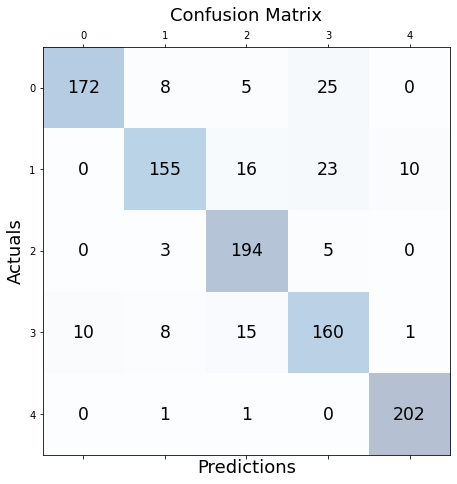

In [70]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### **11 - TRAINING LOSS CURVE**

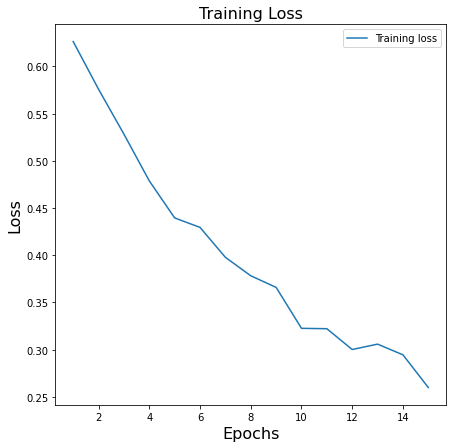

In [71]:
classifier_dict = hist.history
loss_values = classifier_dict['loss']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the loss vs Epochs

ax.plot(epochs, loss_values, '-', label='Training loss')
ax.set_title('Training Loss', fontsize=16)
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
ax.legend()

### **12 - ROC CURVE**

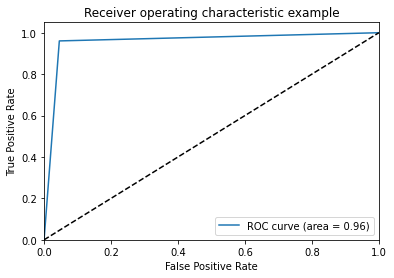

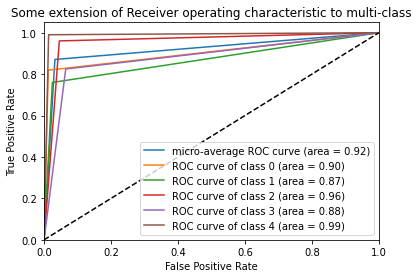

In [72]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

y_t = label_binarize(Y_test, classes=[0, 1, 2, 3, 4])
y_pr = label_binarize(y_pred, classes=[0, 1, 2, 3, 4])

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_t[:, i], y_pr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_t.ravel(), y_pr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### **13 - CONCLUSION**

#### **In Model Training From Scratch Phase:**


---


*   Initial Learning rate was ***0.001***
*   The Include Top was set to ***True***
*   Our Model shape is ***(224, 224, 3)***
*   Weights are set to ***NONE***
*   We used the Optimizer ***Adam***
*   Our Loss Function was ***Sparse Categorical Crossentropy***
*   Batch Size was ***32***
*   Epoch Size was ***40***

**Results:**


> *Train Accuracy:* **68%**

> *Validation Accuracy:* **61%**

> *Test Accuracy:* **63%**

#### **In Transfer Learning Phase:**


---


* Our Model shape is ***(224, 224, 3)***
* The Include Top was set to ***False***
* Weights is set to ***ImageNet***
* We used the Optimizer ***Adam***
* Learning Rate was updated to ***0.0001***
* We used ***Average Pooling***
* Our Loss Function was ***Sparse Categorical Crossentropy***
* We Used Regularization ***Dropout of 20%***
* Batch Size was ***32***
* Epoch Size was ***25***

**Results:**


> *Train Accuracy:* **51%**

> *Validation Accuracy:* **49%**

> *Test Accuracy:* **50%**

#### **In Unfreezing Model Phase:**


---


* We used ***Batch Normalization***
* We used the Optimizer ***Adam***
* Our Loss Function was ***Sparse Categorical Crossentropy***
* Learning Rate was set to ***0.0001***
* Batch Size was ***32***
* Epoch Size was ***10***

**Results:**


> *Train Accuracy:* **74%**

> *Validation Accuracy:* **69%**

> *Test Accuracy:* **69.7%**